### Recommendations based on Recent activities for items (clicked, watched, purchased, liked, rated, etc.).

1. Recent search history
2. Recently liked
3. Recently rated 
4. Timestamp of activity



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv('recent_activity.csv')
df_data = pd.read_csv('dataset.csv')
df.head(10)

,Meal_Id,Rated,Liked,Searched,Timestamp
0,meal_id2,0,1,0,2020-03-01 14:03:58
1,meal_id11,0,0,1,2020-03-02 00:06:48
2,meal_id16,0,1,0,2020-03-02 06:08:30
3,meal_id18,0,1,0,2020-03-02 14:10:46
4,meal_id19,0,0,1,2020-03-03 20:19:16
5,meal_id24,0,0,1,2020-03-04 22:26:38
6,meal_id29,1,0,0,2020-03-06 10:36:50
7,meal_id31,0,0,1,2020-03-06 16:38:32
8,meal_id35,0,0,1,2020-03-06 16:38:32
9,meal_id38,0,1,0,2020-03-06 22:40:14


#### Findind similar items on the basis of recent activity

- finding the most popular items in recent activity
- selecting the features that occour more than mean occurance of features
- recommending on those features

In [71]:
meal_ids = list(df.Meal_Id.unique())
recent_data = df_data[df_data.Meal_Id.isin(meal_ids)][['Nutrient','catagory','Disease','Diet']].reset_index(drop=True)


calcium          25
magnesium        11
selenium         11
fiber             9
iron              6
vitamin_e         6
chloride          6
carbohydrates     5
vitamin_a         5
vitamin_c         4
vitamin_d         3
potassium         1
Name: Nutrient, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

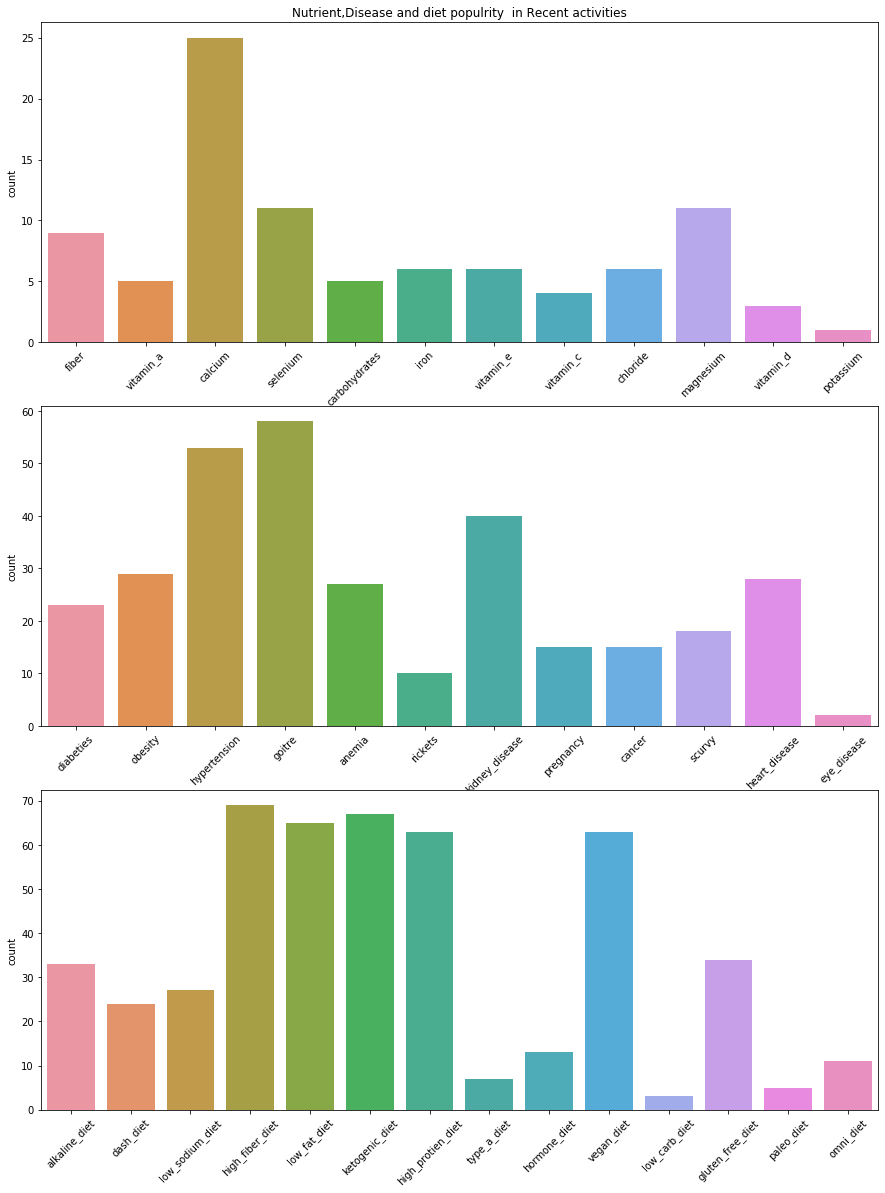

In [112]:
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
plt.xticks(rotation=45)
plt.title('Nutrient,Disease and diet populrity  in Recent activities')
print(recent_data.Nutrient.value_counts())

sns.countplot(recent_data.Nutrient)
disease = []
for i in range(recent_data.shape[0]):
    for j in recent_data.loc[i,'Disease'].split():
        disease.append(j)

plt.subplot(3,1,2)    
sns.countplot(disease)
plt.xticks(rotation=45)

diet = []
for i in range(recent_data.shape[0]):
    for j in recent_data.loc[i,'Diet'].split():
        diet.append(j)

plt.subplot(3,1,3)    
sns.countplot(diet)
plt.xticks(rotation=45)


### Feature selection

In [113]:

value_counts = recent_data.Nutrient.value_counts()
m = recent_data.Nutrient.value_counts().mean()
print('mean occurance',m)
features = list(value_counts[recent_data.Nutrient.value_counts()>m].index)
value_counts[recent_data.Nutrient.value_counts()>m]

mean occurance 7.666666666666667


calcium      25
magnesium    11
selenium     11
fiber         9
Name: Nutrient, dtype: int64

In [114]:
a = dict(Counter(disease))
# a = sorted(a.items(),key = lambda k:k[1],reverse=True)
print('mean occurance',np.mean(list(a.values())))
m = np.mean(list(a.values()))
for i in a.items():
    if i[1]>m:
        print(i)
        features.append(i[0])

mean occurance 26.5
('obesity', 29)
('hypertension', 53)
('goitre', 58)
('anemia', 27)
('kidney_disease', 40)
('heart_disease', 28)


In [115]:
a = dict(Counter(diet))
# a = sorted(a.items(),key = lambda k:k[1],reverse=True)
print('mean occurance',np.mean(list(a.values())))
m = np.mean(list(a.values()))
for i in a.items():
    if i[1]>m:
        print(i)
        features.append(i[0])

mean occurance 34.57142857142857
('high_fiber_diet', 69)
('low_fat_diet', 65)
('ketogenic_diet', 67)
('high_protien_diet', 63)
('vegan_diet', 63)


### Final Features to recommend with

In [117]:
print(features)

['calcium', 'magnesium', 'selenium', 'fiber', 'obesity', 'hypertension', 'goitre', 'anemia', 'kidney_disease', 'heart_disease', 'high_fiber_diet', 'low_fat_diet', 'ketogenic_diet', 'high_protien_diet', 'vegan_diet']


### further recommendation is done by knn